<a href="https://colab.research.google.com/github/LiscaAngriani/APM_Kelompok3/blob/main/KNearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset= pd.read_csv("lulus.csv")
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.head()

,IPK,Pelatihan Pengembangan Diri,Prestasi,Forum Komunikasi Kuliah,Kegiatan Organisasi,Lulus Cepat
0,3.26,6,1,2,4,0
1,3.12,6,0,1,1,0
2,3.29,6,4,3,3,0
3,3.10,2,0,6,2,1
4,3.12,3,0,4,2,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print(X_train)

[[2 3]
 [3 1]
 [0 2]
 [1 2]
 [4 2]
 [1 2]
 [0 2]
 [1 2]
 [2 2]
 [1 4]
 [4 3]
 [2 3]
 [2 1]
 [3 6]
 [0 5]
 [1 2]
 [1 1]
 [2 1]
 [0 5]
 [0 2]
 [1 1]
 [0 1]
 [2 6]
 [0 1]
 [0 6]
 [0 1]
 [2 3]
 [0 5]
 [0 1]
 [1 2]
 [1 6]
 [0 4]
 [1 1]
 [0 6]
 [1 2]
 [1 1]
 [1 1]]


In [7]:
print(y_train)

[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1]


In [8]:
print(X_test)

[[0 1]
 [2 1]
 [2 5]
 [2 6]
 [4 3]
 [3 1]
 [0 2]
 [4 1]
 [0 6]
 [0 4]
 [1 3]
 [3 1]
 [1 2]]


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[ 0.80368369  0.18468096]
 [ 1.70478358 -0.95418498]
 [-0.9985161  -0.38475201]
 [-0.0974162  -0.38475201]
 [ 2.60588348 -0.38475201]
 [-0.0974162  -0.38475201]
 [-0.9985161  -0.38475201]
 [-0.0974162  -0.38475201]
 [ 0.80368369 -0.38475201]
 [-0.0974162   0.75411393]
 [ 2.60588348  0.18468096]
 [ 0.80368369  0.18468096]
 [ 0.80368369 -0.95418498]
 [ 1.70478358  1.89297988]
 [-0.9985161   1.3235469 ]
 [-0.0974162  -0.38475201]
 [-0.0974162  -0.95418498]
 [ 0.80368369 -0.95418498]
 [-0.9985161   1.3235469 ]
 [-0.9985161  -0.38475201]
 [-0.0974162  -0.95418498]
 [-0.9985161  -0.95418498]
 [ 0.80368369  1.89297988]
 [-0.9985161  -0.95418498]
 [-0.9985161   1.89297988]
 [-0.9985161  -0.95418498]
 [ 0.80368369  0.18468096]
 [-0.9985161   1.3235469 ]
 [-0.9985161  -0.95418498]
 [-0.0974162  -0.38475201]
 [-0.0974162   1.89297988]
 [-0.9985161   0.75411393]
 [-0.0974162  -0.95418498]
 [-0.9985161   1.89297988]
 [-0.0974162  -0.38475201]
 [-0.0974162  -0.95418498]
 [-0.0974162  -0.95418498]]


In [21]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])
    neighbors=[]
    for i in range(self.k):
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [22]:
model=KNN(5)
model.fit(X_train,y_train)

5


In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
predictions=model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 2]
 [1 8]]


0.7692307692307693

In [27]:
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

[[2 2]
 [1 8]]


0.7692307692307693

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


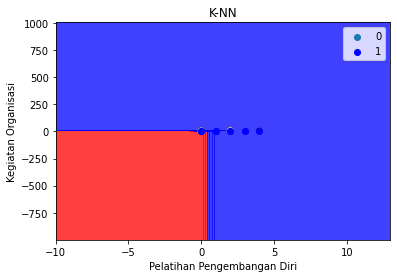

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('K-NN')
plt.xlabel('Pelatihan Pengembangan Diri')
plt.ylabel('Kegiatan Organisasi')
plt.legend()
plt.show()